In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

In [20]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# Simplest Neural Network (for testing)

In [25]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

Epoch 1/1
190820/190820 [==============================] - 13s - loss: 0.0286 - acc: 0.9982    


In [27]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

Loss:  [0.026239194900963873, 0.99837211529254044]


In [28]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93834  0    93834
1            153  0      153
__all__    93987  0    93987


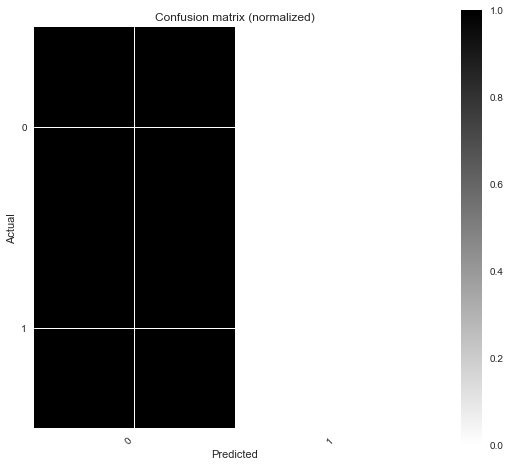

In [44]:
from pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

In [45]:
confusion_matrix.print_stats()

/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:339: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FNR) / self.TNR)
/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:251: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FN) / self.NegativeTest)


Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93834  0    93834
1            153  0      153
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.998372115293
95% CI: (0.99809303053729637, 0.99861967548897745)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93834         153
N: Condition negative                         153       93834
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93834           0
TN: True Negative                               0       93834
FP: False Positive                            153           0
FN: False Negative                              0         153
TPR: 

/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/Users/georgymh/anaconda/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


# Oversampling with gaussian noise (commented out)

In [30]:
# noise = np.random.normal(0,.1,30)

# # 0 is the mean of the normal distribution you are choosing from
# # 1 is the standard deviation of the normal distribution
# # 100 is the number of elements you get in array noise
# noise

In [31]:
# frauds.head()

In [32]:
# for i in range(300):
#     #frauds.iloc[i] += noise[i]
#     frauds.append(frauds.iloc[i % 30] + noise[i % 30])

In [33]:
# NEED TO ADD A (DIFFERENT BUT SIMILAR) RANDOM NOISE ARRAY TO EVERY ROW OF FRAUDS TABLE (WITHOUT CLASS)
# THEN ADD THIS TO ORIGINAL FRAUDS TABLE (MAKING MORE DATA POINTS)
# AND RE SPLIT DATA AND DO NEURAL NET
# ALSO TRY FORCING 50% OF FRAUDS INTO TRAINING SET AND 50% INTO TEST SET

# Neural Network after Oversampling, Scaling, and PCA (10 components)

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

array([[-2.4448525 , -0.82152584, -0.17220272, ..., -1.68354709,
        -0.36831529, -0.26526041],
       [-2.18904068, -0.72670741,  0.87786002, ..., -1.11916378,
         0.88673604,  0.15649273],
       [-2.56965118, -0.32978225,  0.50729605, ...,  0.28042025,
        -0.52953134, -0.89572361],
       ..., 
       [ 2.69419572,  0.48653567,  0.2388476 , ..., -0.12258431,
        -0.03518196,  2.11292303],
       [ 1.87017491,  0.51751185, -0.65521505, ..., -0.29825332,
         0.56147921, -0.83751973],
       [-1.68516108,  0.32780463, -2.36850653, ..., -1.48417405,
        -2.18489752, -1.24560614]])

In [35]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 27)                297       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                560       
_________________________________________________________________
dense_13 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 16        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [37]:
X2_test = pca.fit_transform(X_test)
h = model2.fit(X2, y2, epochs=5, validation_data=(X2_test, y_test))

Train on 380962 samples, validate on 93987 samples
Epoch 1/5
380962/380962 [==============================] - 39s - loss: 0.0159 - acc: 0.9948 - val_loss: 8.4765 - val_acc: 0.4683
Epoch 2/5
380962/380962 [==============================] - 37s - loss: 0.0056 - acc: 0.9984 - val_loss: 8.4765 - val_acc: 0.4683
Epoch 3/5
380962/380962 [==============================] - 39s - loss: 0.0047 - acc: 0.9987 - val_loss: 8.4765 - val_acc: 0.4683
Epoch 4/5
380962/380962 [==============================] - 39s - loss: 0.0041 - acc: 0.9989 - val_loss: 8.4765 - val_acc: 0.4683
Epoch 5/5
380962/380962 [==============================] - 37s - loss: 0.0038 - acc: 0.9990 - val_loss: 8.4765 - val_acc: 0.4683


In [38]:
print("Loss: ", model2.evaluate(X2_test, y_test, verbose=2))

Loss:  [8.4765311850906038, 0.46830944705150501]


In [39]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y_test)

Confusion matrix:
Predicted    0.0    1.0  __all__
Actual                          
0.0        43924  49910    93834
1.0           62     91      153
__all__    43986  50001    93987


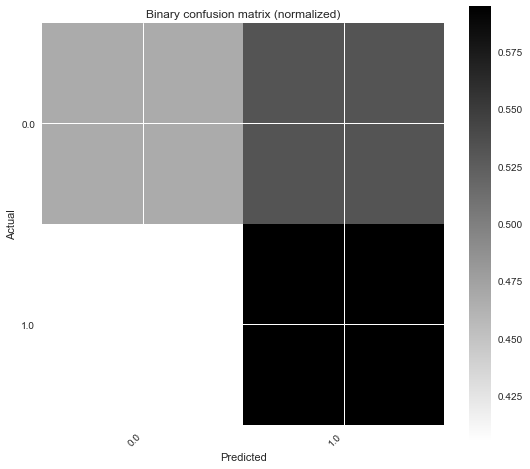

population: 93987
P: 153
N: 93834
PositiveTest: 50001
NegativeTest: 43986
TP: 91
TN: 43924
FP: 49910
FN: 62
TPR: 0.59477124183
TNR: 0.468103246158
PPV: 0.00181996360073
NPV: 0.998590460601
FPR: 0.531896753842
FDR: 0.998180036399
FNR: 0.40522875817
ACC: 0.468309447051
F1_score: 0.00362882322447
MCC: 0.00507988302502
informedness: 0.0628744879882
markedness: 0.000410424201828
prevalence: 0.00162788470746
LRP: 1.11820806864
LRN: 0.865682435437
DOR: 1.2917070081
FOR: 0.0014095393989


In [43]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()